In [9]:
from keras.datasets import imdb 
(train_data, train_labels),(test_data, test_labels) = imdb.load_data( num_words=10000)

In [10]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [11]:
train_labels[0:20]

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1],
      dtype=int64)

In [12]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results


In [13]:
x_train = vectorize_sequences(train_data) 
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')


In [14]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [15]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [16]:

from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])




In [17]:
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])


In [18]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]


In [19]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - acc: 0.7547 - loss: 0.5512 - val_acc: 0.8584 - val_loss: 0.4308
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.8911 - loss: 0.3449 - val_acc: 0.8848 - val_loss: 0.3242
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.9195 - loss: 0.2511 - val_acc: 0.8847 - val_loss: 0.2971
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.9355 - loss: 0.2003 - val_acc: 0.8839 - val_loss: 0.2874
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.9461 - loss: 0.1680 - val_acc: 0.8863 - val_loss: 0.2798
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.9567 - loss: 0.1448 - val_acc: 0.8859 - val_loss: 0.2895
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.9627 - loss: 0.1237 - val_acc: 0.8864 - val_loss: 0.2940
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.9689 - loss: 0.1052 - val_acc: 0.8790 - val_loss: 0.3380
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.9713 - loss:

In [20]:
history_dict = history.history
history_dict.keys()


dict_keys(['acc', 'loss', 'val_acc', 'val_loss'])

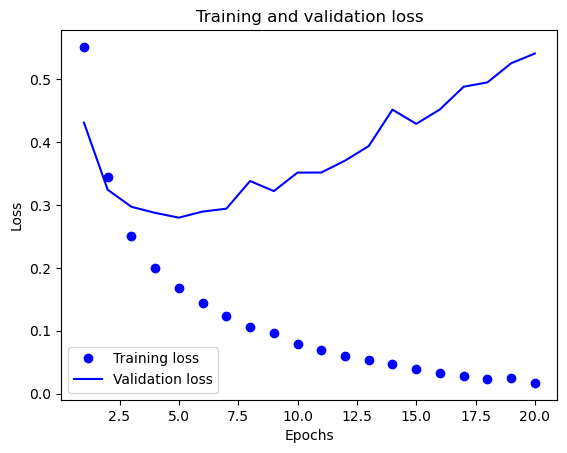

In [21]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [22]:
# 1 hidden layer of 16 units
model_1layer = models.Sequential()
model_1layer.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model_1layer.add(layers.Dense(1, activation='sigmoid'))

model_1layer.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
                     loss='binary_crossentropy',
                     metrics=['acc'])

history_1layer = model_1layer.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

test_loss_1, test_acc_1 = model_1layer.evaluate(x_test, y_test)
print("1-layer model test accuracy:", test_acc_1)



Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - acc: 0.7869 - loss: 0.5135 - val_acc: 0.8620 - val_loss: 0.4047
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.8953 - loss: 0.3401 - val_acc: 0.8845 - val_loss: 0.3300
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.9142 - loss: 0.2700 - val_acc: 0.8861 - val_loss: 0.2987
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.9273 - loss: 0.2272 - val_acc: 0.8901 - val_loss: 0.2826
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.9369 - loss: 0.1982 - val_acc: 0.8895 - val_loss: 0.2757
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.9461 - loss: 0.1762 - val_acc: 0.8856 - val_loss: 0.2835
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.9515 - loss: 0.1592 - val_acc: 0.8796 - val_loss: 0.2941
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.9557 - loss: 0.1447 - val_acc: 0.8875 - val_loss: 0.2781
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.9615 - loss: